<h1>Foundations Final Project</h1>
<h3>Title: <b>IPU (Image Processing Unit) Library </b></h3>
<p>Course: <b>Foundations of Data Science: Programming and Linear Algebra</b></p>
<p>Course code: <b>CDSCO1001U.LA_E21</b></p>
<p>Members: <b>Jan Gaydoul, Wiktoria Lazarczyk, Stefano Pontello, Emanuela Zucchetto</b></p> 

In [1]:
## List of dependencies
# OpenCV
import cv2
# System lib
import sys
# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline
# Numpy for algebra operations
import numpy as np

In [2]:
class Image(object):
  
    def __init__(self, img, img_description):
        # Exception: opencv can read only jpg, png, and tiffs files
        if img[-3:] == 'jpg' or img[-3:] == 'png' or img[-3:] == 'tif':
            # Use cv2.imread to load the image into a Numpy array
            self.img_values_matrix = cv2.imread(img)
        else: 
            raise ValueError('This library support only JPG, PNG and TIF files')
        
        # Conversion from BGR to RGB values
        self.img_rgb = cv2.cvtColor(self.img_values_matrix, cv2.COLOR_BGR2RGB)
        # Load image description attribute
        self.img_description = img_description
        # Load image width attribute
        self.img_width = self.img_rgb.shape[1]
        # Load image height attribute
        self.img_height = self.img_rgb.shape[0]
        # Load number of channels
        self.channels_number = self.img_rgb[0][0].size
        # User selection parts
        self.selection=[]
        # Since PNG could contain 4 channels (RGB + Alpha for transparency) we block the possibility to work with those images
        if self.channels_number > 3:
            raise ValueError('Please upload an image that does not contain an alpha channel')
        else: pass

    # Function to get Image shapes attributes
    def getDimension(self): 
        print("Height: ", self.img_height, "Width: ", self.img_width)
    
    # Function to get the image matrix of values
    def get_img_values_matrix(self):
        return self.img_values_matrix 
    
    # Function to get image width
    def get_width(self):
        return self.img_width
    
    #Function to get image height
    def get_height(self):
        return self.img_height
    
    #Function to get the rgb version of the image
    def get_rgb(self):
        return self.img_rgb
    
    #Function to return the number of channels in the image
    def get_channels_number(self):
        return self.channels_number
    
    #Function to show the Image 
    def showImage(self):
        plt.imshow(self.img_rgb)
        
    #Function to check if the image is square or rectangular    
    def isSquare(self):
        if self.img_height == self.img_width:
            # Store the attribute
            print('The image is square')
            self.img_shape = "Square"
        else: 
            print('The image is rectangular')
            self.img_shape = "Rectangular"
    
    # Function to get Image description attribute
    def getImageDescription(self): 
        print(self.img_description)
    
    # Function to check if the image is grayscale or RGB
    def isGrayscale(self):
      # If it contains 1 channel or all the three channels are the same it is Grayscale
        if self.get_channels_number() == 1:
            print('The image is Grayscale and it contains 1 channel')
            return True
        elif self.img_rgb[0][0][0] == self.img_rgb[0][0][1] == self.img_rgb[0][0][2]:
            print('The image is Grayscale, but it contains 3 channels. Please convert it by calling the function grayscaleConversionChannel before proceeding.')
            return False
        elif self.get_channels_number() == 3:
            #print('The image is RGB')
            return False
       
    # Function to convert 3 channels grayscale np array to 1 channel grayscale np array
    def grayscaleConversionChannel(self):
        np_values = []
        for pixel_row in self.img_values_matrix:
            for pixel in pixel_row:
                gray_value = pixel[0]
                np_values.append(gray_value)
        new_array_one_value = np.reshape((np.array(np_values)), (int(self.get_height()), int(self.get_width())))
        self.img_values_matrix = new_array_one_value
        return new_array_one_value

    # Function to convert the image to grayscale
    def grayscaleConversion(self):        
        # Condition to check if the image is already grayscale with 1 channel
        if self.isGrayscale() == True:    
            print('The image is already grayscale and it contains one channel')  
            return self.img_values_matrix
        else:
            # Initialize new empty Numpy array
            new_img_gray = np.array([])
            # Initialize new empty Python array
            new_pixel_row = []
            # Loop through the img rows
            for pixel_row in self.img_rgb:
                # Loop through the pixels
                for pixel in pixel_row:
                    # Retrieving the three different pixel color channels
                    red_channel = pixel[0]
                    green_channel = pixel[1]
                    blue_channel = pixel[2]
                    # Applying the dot product between the two vectors to compute the greyscale value which will range between 0 (pure black) and 255 (pure white)
                    greyscale_value = round((red_channel * 0.299) + (green_channel * 0.587) + (blue_channel * 0.114), 0)
                    # Append the greyscale value to Python list
                    new_pixel_row.append(greyscale_value)
            # Creation of a new Numpy array with the greyscale values
            new_image = np.append(new_img_gray, new_pixel_row)
            # Reshape of the array to fit the original image dimensions
            new_image_reshaped = np.reshape(new_image, (self.img_height, self.img_width))
            # Show the new greyscale image 
            #plt.imshow(new_image_reshaped, cmap='gray', vmin=0, vmax=255)
            return new_image_reshaped

    def blurring(self):
        
        # Select the blurring method
        def blurring_method_selection():
            blurring_method = str(input('Please select the type of blurring: average or gaussian').lower())
            if blurring_method == 'average' or blurring_method == 'gaussian':
                return blurring_method
            else:
                print('Please insert a correct value')
                blurring_method_selection()
        
        # Function to return the desired kernel
        def blur_method_sel(blurring_method):
            if blurring_method == 'average':
                return squareKernelAverage(49)
            elif blurring_method == 'gaussian':
                return matlab_style_gauss2D((25, 25),15) 
            
        # Function to generate a kernel based on specified dimension     
        def squareKernelAverage(size):
            lista = []
            for i in range(size*size):
                lista.append(1)
            avg_kernel = np.reshape(np.array(lista), (size, size))
            return avg_kernel
        
        # Apply the conversion to grayscale
        img_gray_np = self.grayscaleConversion()

        def padding(img_gray_np, kernel):
            
            m,n = kernel.shape  #number of padding layers depend on kernel size
            if (m == n):
                y, x = img_gray_np.shape
        #formula for number of layers that are to be added (rows)
                p_height = int((m - 1) / 2)
        #formula for number of layers that are to be added (columns)
                p_width = int((n - 1) / 2)
        #creating array of 100s that represent matrix accounting for size of image with 'same padding'  
                pad_image = np.full((y + (2 * p_height), x + (2 * p_width)),100)
        #updating padded_image around edges with image matrix
                pad_image[p_height:pad_image.shape[0] - p_height,p_width: pad_image.shape[1] - p_width]=img_gray_np
            return pad_image

        # Function to plot image
        def plot_image(img):
            plt.figure(figsize=(6, 6))
            plt.imshow(img, cmap='gray');
    
        def plot_two_images(img1, img2):
            _, ax = plt.subplots(1, 2, figsize=(12, 6))
            ax[0].imshow(img1, cmap='gray')
            ax[1].imshow(img2, cmap='gray');

        # Function to create a personalized kernel based on a Gaussian distribution
        def matlab_style_gauss2D(shape,sigma):
            """
            2D gaussian mask - should give the same result as MATLAB's
            fspecial('gaussian',[shape],[sigma])
            credits to https://stackoverflow.com/users/1461210/ali-m
            post: https://stackoverflow.com/questions/17190649/how-to-obtain-a-gaussian-filter-in-python
            """
            m,n = [(ss-1.)/2. for ss in shape]
            y,x = np.ogrid[-m:m+1,-n:n+1]
            h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
            h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
            sumh = h.sum()
            if sumh != 0:
                h /= sumh
            return h

        def convolution2d(img_gray_np, kernel):    

            m, n = kernel.shape
            if (m == n):
                #Load the number of rows and columns from the attribute
                y, x = img_gray_np.shape #chnage to self.img_height, self.img_width when for sure are fixed   

                #matrix representing padded image
                pad_image = padding(img_gray_np,kernel) #not dynamic: if user changes kernel it will not change here
                #creating array of 0s which represent matrix accounting for size of the image result
                new_image = np.zeros((y,x)) 

            # Iterating over the rows of image matrix
                for i in range(y):
                # Iterating over the columns of image matrix
                    for j in range(x):
                    #applying the convolution - multiplication of current matrix elements and kernel and summing the result
                    # storing the result to i-th row and j-th column of new_image array
                      new_image[i][j] =np.sum(pad_image[i:i+m, j:j+n]*kernel)      
                return new_image

        # kernel using the average method
        # kernel1 = np.full((49,49), 1)
        
        img_blurred = convolution2d(img_gray_np, kernel=blur_method_sel(blurring_method_selection()))
        print(img_blurred.shape)
        plot_two_images(
            img1=img_gray_np, 
            img2=img_blurred
        )

    # Function to partition the image and store the partitions into the instance attribute as numpy arrays
    def img_partitioning(self):
        #get the shape of the image
        rows= self.get_height()
        columns= self.get_width() 
        #get the grayscale version of the image by calling the function grayscaleConversion()
        np_img=self.grayscaleConversion()
        #dividing pixel in rows and columns in 4
        row_unit=rows//4
        col_unit=columns//4
        #setting the indexes for partitioning every 1/4 of the lenght and the last one as the final row and column value to ensure no row/column is lost
        row_split=[0,row_unit*1,row_unit*2,row_unit*3,rows]
        col_split=[0,col_unit*1,col_unit*2,col_unit*3,columns]
        parts=[]
        #looping through the elements in the list row_split, which are used as basis to define initial and final row index for the partition
        for i in range(len(row_split)-1):
            ri=row_split[i]
            rf=row_split[i+1]
            #looping through the elements in the list column_split, which are used as basis to define initial and final column index for the partition
            for i in range(len(col_split)-1):
                ci=col_split[i]
                cf=col_split[i+1]
                #individuating the parition
                x=(np_img[ri:rf,ci:cf])
                #storing each partition in the list part
                parts.append(x)
        self.np_parts = np.array(parts)
        #calling the function show_partitions() to have all the partitions displayed 
        self.show_partitions(self.np_parts)
      
    # Function to show the partitions  
    def show_partitions(self, np_parts):
        # Each of the 16 paritions is represented in one of the subplot
        fig, axs = plt.subplots(4, 4)
        # Assign each partition to a subplot
        j=0
        for i in range (0,4):
            for k in range(0,4):
                axs[i, k].imshow(np_parts[j],cmap='gray', vmin=0, vmax=255)
                axs[i, k].set_title(j)
                axs[i,k].axis("off")
                j+=1
        # Fixing distances beetween subplots
        plt.subplots_adjust(left=0.3,
                            bottom=0.01, 
                            right=0.9, 
                            top=0.9, 
                            wspace=0.4, 
                            hspace=0.4)    

    # Function where the user can define on which partition to operate
    def create_selection(self):
        #self.img_partitioning()
        def add_selection_element():
            #the user is asked if they want to add other partitions to the list 
            new=input("Do you want to blur other partitions? Yes/No ").lower()
            #with a positive answer the function that adds elements to the list selection is called
            if new=="yes":
                self.create_selection()
            #if the answer is not clear the same function is called again
            elif new!="yes" and new!="no":
                print("please enter a valid answer")
                add_selection_element()   

        x = input("Please insert the number of the partition you want to blur ")
        try:
            x=int(x)
            #since there are 16 partitions the numer has to correspond to index 0 to 15
            if x<0 or x>15:
                print("Please enter only number between 0 and 15")
            #if the number is in the correct range it is appended to the list
            else:
                if x in self.selection:
                    print ("The partition is already in the list")
                else:
                    self.selection.append(x)        
        except ValueError:
            print("Please enter an integer number. ")
        #asking the user if they desire to add new paritions
        add_selection_element()

        # The partition corresponding to each element in selection is blurred
        for i in self.selection:
            self.blurring_partitions(i)
        # Function to recompose the partition and show the image with the blurred partitions
        self.recompose_img()
        # Clearing the selection list
        self.clear_selection() 

    # Function to clear the partitions selection
    def clear_selection(self):
        # Clearing the self.selection list
        self.selection = []

    # Function to blur a single partitions, retrieving it from the instance attribute
    def blurring_partitions(self, partition):
        if type(partition)!=int:
            raise ValueError ("The parameter must be of type integer")
        elif partition<0 or partition>15:
            raise IndexError ("The parameter does not correspond to a partition of the image") 
        else: 
            try:        
            #img_gray_np = Image.grayscaleConversion(self)
                img_gray_np=self.np_parts[partition] 
            except AttributeError:
                self.img_partitioning()
                img_gray_np=self.np_parts[partition] 

            finally:

                def padding(img_gray_np, kernel):

                    m,n = kernel.shape  #number of padding layers depend on kelner size
                    if (m == n):
                        y, x = img_gray_np.shape
                    #formula for number of layers that are to be added (rows)
                        p_height = int((m - 1) / 2)
                    #formula for number of layers that are to be added (columns)
                        p_width = int((n - 1) / 2)
                    #creating array of 100s that represent matrix accounting for size of image with 'same padding'  
                        pad_image = np.full((y + (2 * p_height), x + (2 * p_width)),100)
                    #updating padded_image around edges with image matrix
                        pad_image[p_height:pad_image.shape[0] - p_height,p_width: pad_image.shape[1] - p_width]=img_gray_np
                    return pad_image

                # Function to create a personalized kernel based on a Gaussian distribution
                def matlab_style_gauss2D(shape,sigma):
                    """
                    2D gaussian mask - should give the same result as MATLAB's
                    fspecial('gaussian',[shape],[sigma])
                    credits to https://stackoverflow.com/users/1461210/ali-m
                    post: https://stackoverflow.com/questions/17190649/how-to-obtain-a-gaussian-filter-in-python
                    """
                    m,n = [(ss-1.)/2. for ss in shape]
                    y,x = np.ogrid[-m:m+1,-n:n+1]
                    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
                    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
                    sumh = h.sum()
                    if sumh != 0:
                        h /= sumh
                    return h

                def convolution2d(img_gray_np, kernel):     
                    m, n = kernel.shape
                    if (m == n):
                        #Load the number of rows and columns from the attribute
                        y, x = img_gray_np.shape[0], img_gray_np.shape[1]

                        #matrix representing padded image
                        pad_image = padding(img_gray_np,kernel) 
                        #creating array of 0s which represent matrix accounting for size of the image result
                        new_image = np.zeros((y,x)) 

                        # Iterating over the rows
                        for i in range(y):
                        # Iterating over the columns
                            for j in range(x):
                                #applying the convolution - element-wise multiplication of current matrix and kernel and summing the result
                                # storing the result to i-th row and j-th column of new_image array
                                new_image[i][j] =np.sum(pad_image[i:i+m, j:j+n]*kernel)               
                        return new_image


                img=convolution2d(img_gray_np, kernel=matlab_style_gauss2D((49,49),15))
                self.np_parts[partition]=img
                plt.imshow(img, cmap='gray', vmin=0, vmax=255)

    #Function to recompose the partitions in a single image
    def recompose_img(self):
        try:
            #use np.hstack() to allign together the partitions in each row
            first_row=np.hstack((self.np_parts[0],self.np_parts[1],self.np_parts[2],self.np_parts[3]))
            second_row=np.hstack((self.np_parts[4],self.np_parts[5],self.np_parts[6],self.np_parts[7]))
            third_row=np.hstack((self.np_parts[8],self.np_parts[9],self.np_parts[10],self.np_parts[11]))
            fourth_row=np.hstack((self.np_parts[12],self.np_parts[13],self.np_parts[14],self.np_parts[15]))
            #use np.vstack() to allign vertically the four rows
            entire_img=np.vstack((first_row, second_row, third_row, fourth_row))
            plt.imshow(entire_img, cmap='gray', vmin=0, vmax=255)
            Image.saveImage(entire_img)
        except AttributeError:
            print("Before recomposing the image you should partition it.")
                      
    def saveImage(entire_img):
        choice = str(input('Do you want to save the image? yes/no'))
        if choice == 'yes':
            cv2.imwrite('image_blurred.jpg', entire_img)
        elif choice == 'no':
            pass
        else: 
            print('Please insert a valid answer')
            Image.saveImage(entire_img)

        
        

# Testing

In [3]:
# Testing

# Create new instances for 4 images
image1 = Image('test_images/color_image.png', "RGB Test image") # PNG, color image
image2 = Image('test_images/lake.tif', "TIF gray Test image") # TIF, gray image (3 channels)
image3 = Image('test_images/HQ_nature.jpg', "HQ nature image") # JPG, 4K color image
image4 = Image('test_images/cat2.jpg', "Cat") # JPG, color image
#image5 = Image('test_images/gray_image_gif.gif', "Cat GIF") # GIF, gray image (unsupported) 


### TEST IMAGE 1

Please select the type of blurring: average or gaussianaverage
(512, 512)


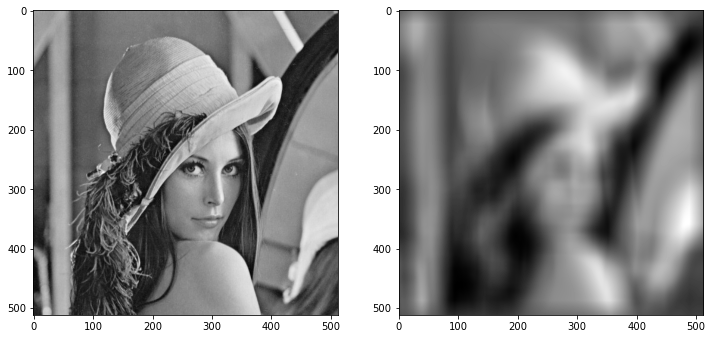

In [4]:
# FULL IMAGE BLURRING
image1.blurring()

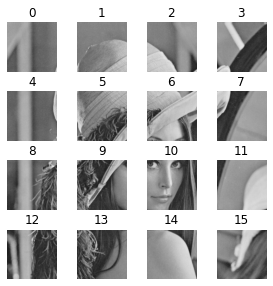

In [5]:
# Image partitioning
image1.img_partitioning()

Please insert the number of the partition you want to blur 10
Do you want to blur other partitions? Yes/No no
Do you want to save the image? yes/noyes


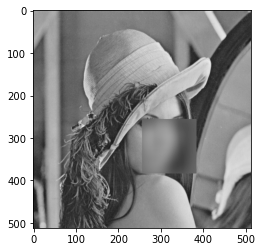

In [6]:
# Create selection and blur
image1.create_selection()